### Assignment 2 Multi Linear Regression 

Preparing a prediction model for profit of 50_startups data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### so, with the help of this we'll get to know , there are no null values present in the data 

#### we'll rename the columnns for our better conveniance

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
label = LabelEncoder()
data["State"]=label.fit_transform(data["State"])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
data1 = data.rename({'R&D Spend': 'rds', 'Administration': 'admin', 'Marketing Spend': 'marketing','State':'state'}, axis=1)
data1.head()

,rds,admin,marketing,state,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
data1.shape

(50, 5)

#### Now we'll check the outliers from each atributes , so for that we need to import visualisation libraries

In [10]:
import matplotlib.pyplot as plt

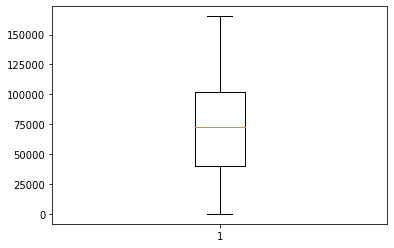

In [12]:
plt.boxplot(data1.rds)
plt.show()

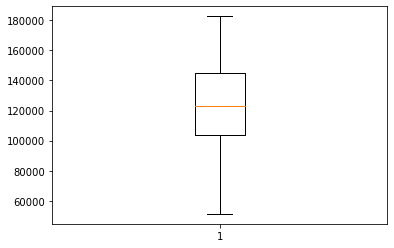

In [13]:
plt.boxplot(data1.admin)
plt.show()

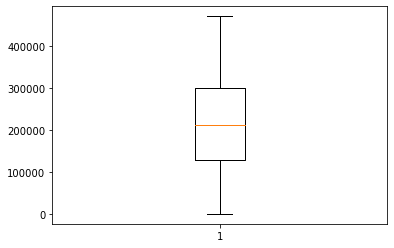

In [14]:
plt.boxplot(data1.marketing)
plt.show()

In [15]:
import seaborn as sns

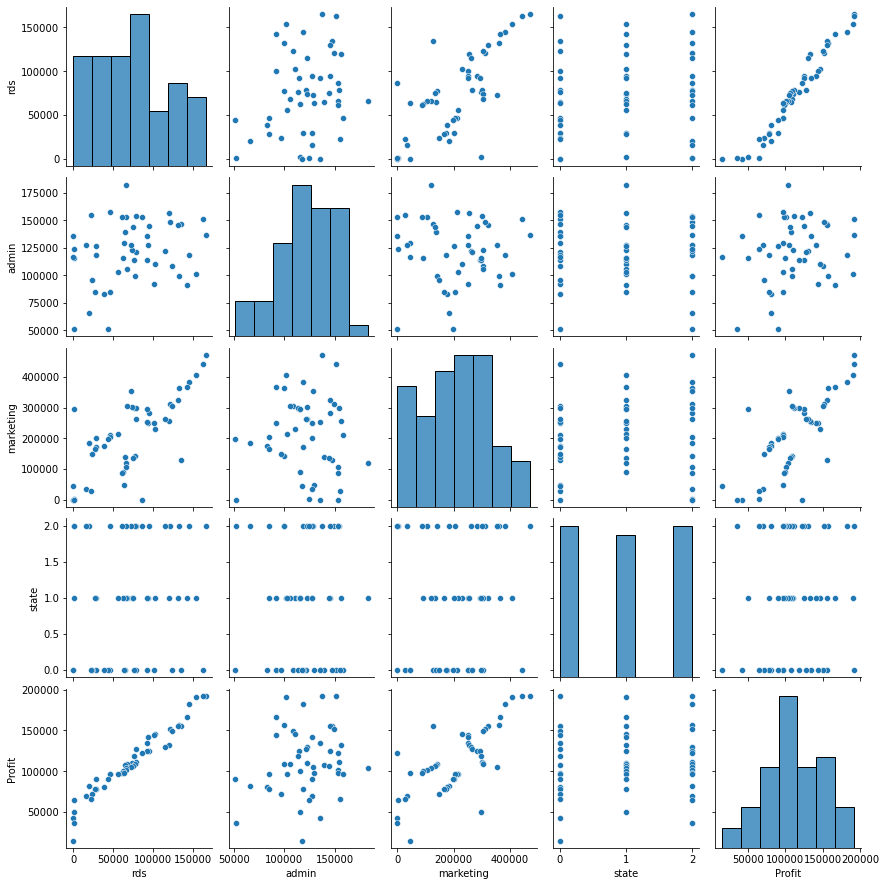

In [16]:
sns.pairplot(data1)

#### Now we'll check for the correlation

In [17]:
data1.corr()

,rds,admin,marketing,state,Profit
rds,1.000000,0.241955,0.724248,0.104685,0.972900
admin,0.241955,1.000000,-0.032154,0.011847,0.200717
marketing,0.724248,-0.032154,1.000000,0.077670,0.747766
state,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


### Now we'll try to fit a model for better profit - Model 1

In [18]:
import statsmodels.formula.api as smf

In [19]:
model1 = smf.ols('Profit~rds+admin+marketing+state', data = data1).fit()

In [20]:
model1.params

Intercept    50142.506443
rds              0.805760
admin           -0.026826
marketing        0.027228
state          -22.320577
dtype: float64

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           8.51e-29
Time:                        17:50:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
rds            0.8058      0.046     17.609      0.000       0.714       0.898
admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
marketing      0.0272      0.017      1.637      0.109      -0.006       0.061
state        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From the above results,The value of R sq is 0.951 and Adj R sq value is 0.948, both are greater than 0.85 which means this model1 is good for predict the profit.

#### But in above case some variables have p values greater than 0.05, so it is insignificant - we'll check with new model


### Here ,We'll check individually , how much each attribute contributing to the output varable 

##### Model-2

In [22]:
model_admin=smf.ols('Profit~admin',data=data1).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 02 Jun 2021   Prob (F-statistic):              0.162
Time:                        17:50:29   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### model-3

In [23]:
model_admin=smf.ols('Profit~marketing',data=data1).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        17:50:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### model-4 

In [24]:
model_admin=smf.ols('Profit~state',data=data1).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Wed, 02 Jun 2021   Prob (F-statistic):              0.482
Time:                        17:50:31   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
state       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### we'll evn check VIF values

In [25]:
# VIF = 1/1-Rsquared

rsqr_rd = smf.ols('rds~state+admin+marketing',data=data1).fit().rsquared
vif_rd = 1/(1-rsqr_rd)

rsqr_admin = smf.ols('admin~state+rds+marketing',data=data1).fit().rsquared
vif_admin = 1/(1-rsqr_admin)

rsqr_marketing = smf.ols('marketing~state+rds+admin',data=data1).fit().rsquared
vif_marketing = 1/(1-rsqr_marketing)

rsqr_state = smf.ols('state~marketing+rds+admin',data=data1).fit().rsquared
vif_state = 1/(1-rsqr_state)

In [26]:
vif = {"names":['rds','admin','marketing','state'],
      "VIF":[vif_rd,vif_admin,vif_marketing,vif_state]}

data_vif=pd.DataFrame(vif)

In [27]:
data_vif

,names,VIF
0,rds,2.481178
1,admin,1.175315
2,marketing,2.326780
3,state,1.011281


#### Model -5

In [28]:
model_rd_mark=smf.ols('Profit~rds+marketing',data=data1).fit()
model_rd_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        17:50:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rds            0.7966      0.041     19.266      0.000       0.713       0.880
marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Analysis

In [29]:
import statsmodels.api as sm

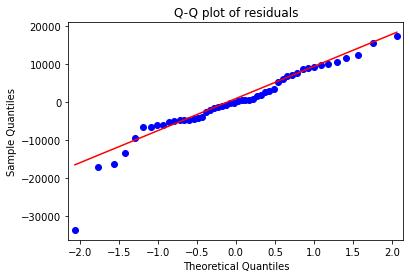

In [30]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

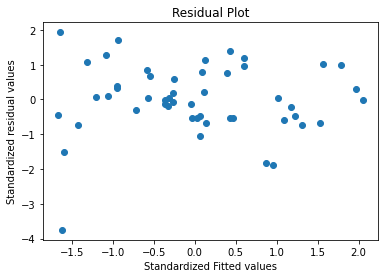

In [33]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


### Cook’s Distance -Outliers can be removed

In [34]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

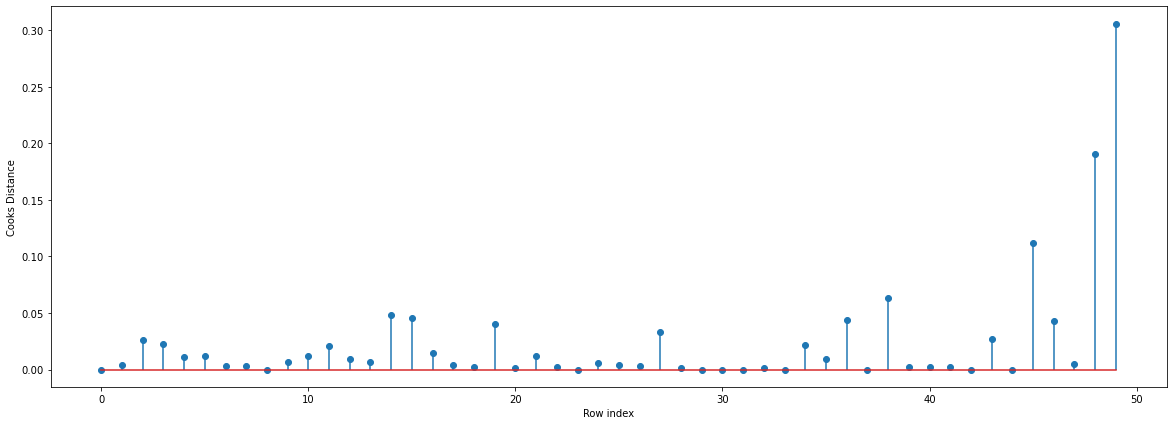

In [35]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

### We will check with Influence plot -  outlier can be removed

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

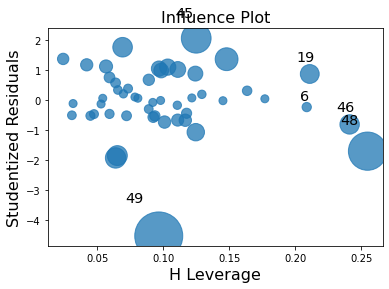

In [38]:
influence_plot(model1)
plt.show()

### We can remove the 49 from our dataset

In [39]:
data1[data1.index.isin([49])]

,rds,admin,marketing,state,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [40]:
data1.shape

(50, 5)

In [41]:
data2 = data1.drop(data1.index[[49]],axis=0).reset_index()

In [42]:
data2.shape

(49, 6)

In [43]:
model_1_2=smf.ols('Profit~rds+admin+marketing+state',data=data2).fit()
model_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.45e-30
Time:                        17:53:20   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
rds            0.7844      0.039     20.367      0.000       0.707       0.862
admin         -0.0225      0.043     -0.522      0.604      -0.109       0.064
marketing      0.0252      0.014      1.811      0.077      -0.003       0.053
state       -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Prediction

In [44]:
predict = model_1_2.predict(data2.iloc[:,:5])

In [45]:
predict.head()

0    189868.789012
1    188621.975818
2    180696.388117
3    171596.047134
4    170974.613858
dtype: float64

In [46]:
profit=data2["Profit"]
profit.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [54]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7855 sha256=e1d4143d65d85c95e1d32716bfa96d8a86e3fa701f4573df6bba21d2306c0ef9
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml-metrics


In [55]:
from ml_metrics import rmse

In [56]:
rmse(predict,profit)

7388.086949398372

### Conclusion - SO , With this we'll get know that MODEL_1_2 giving the best R^2 sq with 0.962 